In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [75]:
df = pd.read_pickle("/Users/ilseeb/Desktop/Postgraduate/Train Punctuality Data/df_train_delays.pkl")

In [76]:
df.head()

,train_serv,delayed,month,destination_region,departure_region,temperature,relative_humidity,wind_speed,wind_direction,time_of_day,date,day_of_week
0,SNCB/NMBS,False,JAN,BRUSSELS-CAPITAL REGION,WALLONIA,9.590943,84.870130,35.428463,185.24713,night,2014-01-01,Wednesday
1,SNCB/NMBS,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,6.050944,86.606674,23.784530,182.60257,morning,2014-01-01,Wednesday
2,SNCB/NMBS,False,JAN,FLANDERS,BRUSSELS-CAPITAL REGION,5.240944,89.317700,21.749481,192.42595,morning,2014-01-01,Wednesday
3,SNCB/NMBS,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,6.840944,83.881490,23.770906,178.26430,morning,2014-01-01,Wednesday
4,SNCB/NMBS,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,7.490944,82.104470,22.253124,170.69006,afternoon,2014-01-01,Wednesday


In [77]:
df_delayed = df[df["delayed"] == True]

In [78]:
df_delayed.head()

,train_serv,delayed,month,destination_region,departure_region,temperature,relative_humidity,wind_speed,wind_direction,time_of_day,date,day_of_week
5,SNCB/NMBS,True,JAN,FLANDERS,BRUSSELS-CAPITAL REGION,5.520944,88.527885,22.065973,185.61758,morning,2014-01-01,Wednesday
15,SNCB/NMBS,True,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,9.760943,80.675850,35.325890,182.92072,night,2014-01-01,Wednesday
25,SNCB/NMBS,True,JAN,FLANDERS,FLANDERS,5.310944,89.072090,21.897945,189.46233,morning,2014-01-01,Wednesday
35,SNCB/NMBS,True,JAN,FLANDERS,FLANDERS,9.250944,81.048710,33.857227,181.82797,night,2014-01-01,Wednesday
36,SNCB/NMBS,True,JAN,FLANDERS,FLANDERS,9.530944,81.033230,34.921856,180.59065,night,2014-01-01,Wednesday


In [79]:
df_delayed_count = df_delayed.groupby([df["date"]]).count()

In [80]:
df_delayed_count = df_delayed_count[["delayed"]]

In [81]:
df_delayed_count.head()

,delayed
date,
2014-01-01,29
2014-01-02,71
2014-01-03,44
2014-01-04,132
2014-01-05,51


In [82]:
df_delayed_count.reset_index(inplace=True)

In [83]:
df_delayed_count.head()

,date,delayed
0,2014-01-01,29
1,2014-01-02,71
2,2014-01-03,44
3,2014-01-04,132
4,2014-01-05,51


In [84]:
df_delayed_count["year"] = pd.DatetimeIndex(df_delayed_count['date']).year
df_delayed_count["month"] = pd.DatetimeIndex(df_delayed_count['date']).month

In [85]:
df_delayed_count.head()

,date,delayed,year,month
0,2014-01-01,29,2014,1
1,2014-01-02,71,2014,1
2,2014-01-03,44,2014,1
3,2014-01-04,132,2014,1
4,2014-01-05,51,2014,1


<BarContainer object of 365 artists>

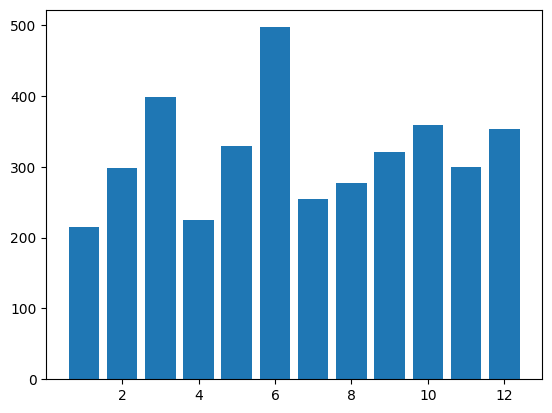

In [87]:
df_delayed_count_2014 = df_delayed_count[df_delayed_count["year"]==2014]
plt.bar(df_delayed_count_2014["month"], df_delayed_count_2014["delayed"])

<BarContainer object of 365 artists>

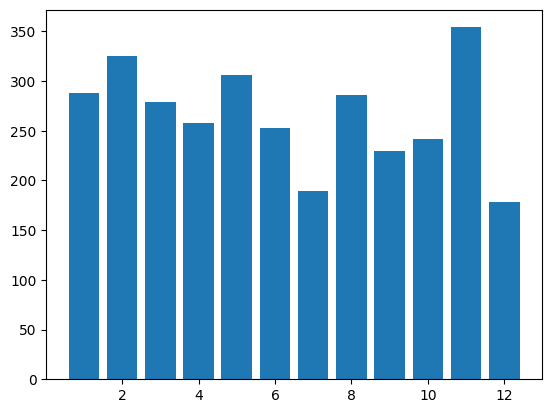

In [88]:
df_delayed_count_2015 = df_delayed_count[df_delayed_count["year"]==2015]
plt.bar(df_delayed_count_2015["month"], df_delayed_count_2015["delayed"])

<BarContainer object of 366 artists>

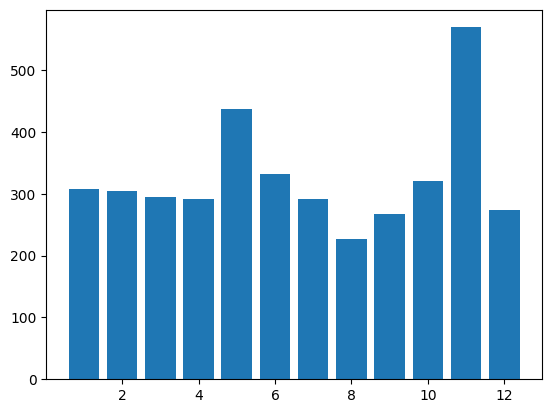

In [89]:
df_delayed_count_2016 = df_delayed_count[df_delayed_count["year"]==2016]
plt.bar(df_delayed_count_2016["month"], df_delayed_count_2016["delayed"])

<BarContainer object of 362 artists>

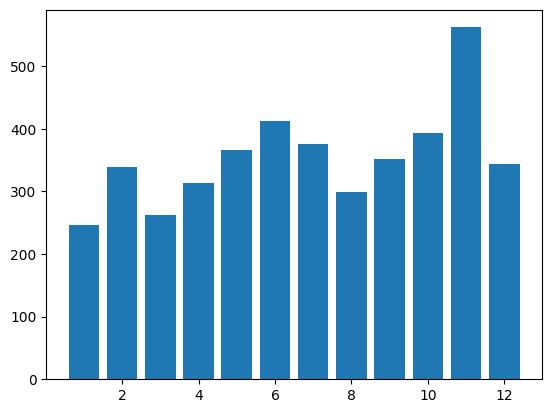

In [90]:
df_delayed_count_2017 = df_delayed_count[df_delayed_count["year"]==2017]
plt.bar(df_delayed_count_2017["month"], df_delayed_count_2017["delayed"])

<BarContainer object of 3284 artists>

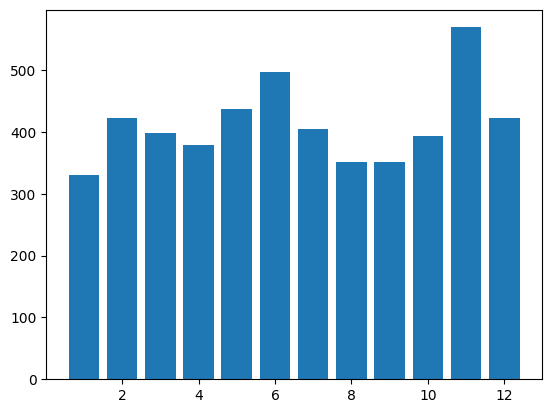

In [91]:
plt.bar(df_delayed_count["month"], df_delayed_count["delayed"])

In [102]:
df_delayed_destination = df_delayed.groupby([df["destination_region"]]).count()
df_delayed_destination.drop(columns=['train_serv', 'month', 'destination_region',
       'departure_region', 'temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'time_of_day', 'date', 'day_of_week'], inplace=True)
df_delayed_destination.reset_index(inplace=True)

In [103]:
df_delayed_destination

,destination_region,delayed
0,BRUSSELS-CAPITAL REGION,138881
1,FLANDERS,185993
2,WALLONIA,104250


<BarContainer object of 3 artists>

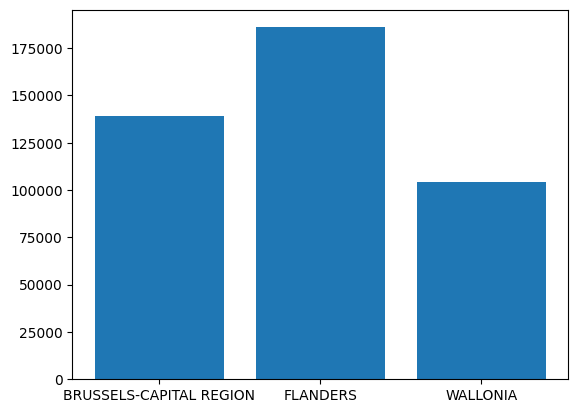

In [105]:
plt.bar(df_delayed_destination["destination_region"], df_delayed_destination["delayed"])